In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../jupyter/environment/wholesome_customers_data.csv')

In [3]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
from sklearn.cluster import KMeans,DBSCAN

<Axes: xlabel='Milk', ylabel='Grocery'>

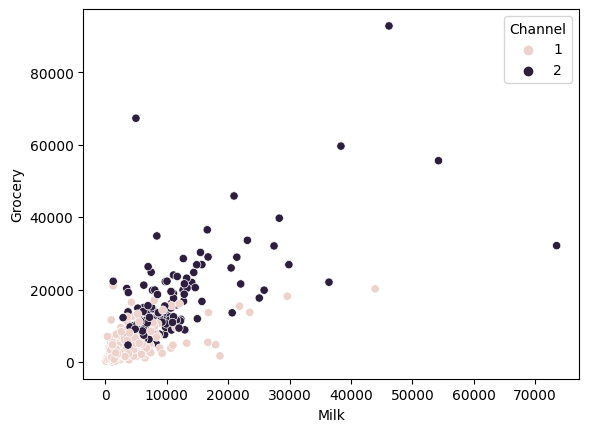

In [8]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')

<Axes: xlabel='Milk', ylabel='Count'>

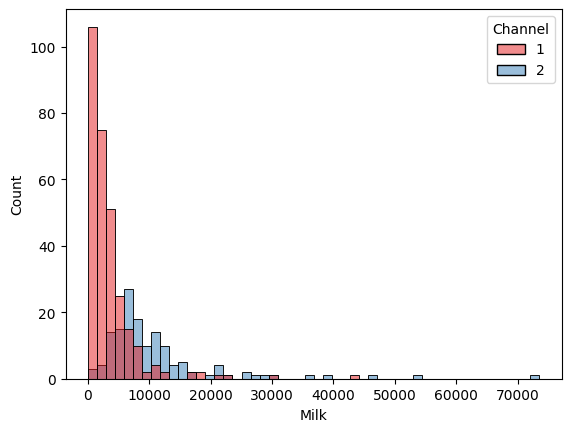

In [11]:
sns.histplot(data=df,x='Milk',hue='Channel',palette='Set1')

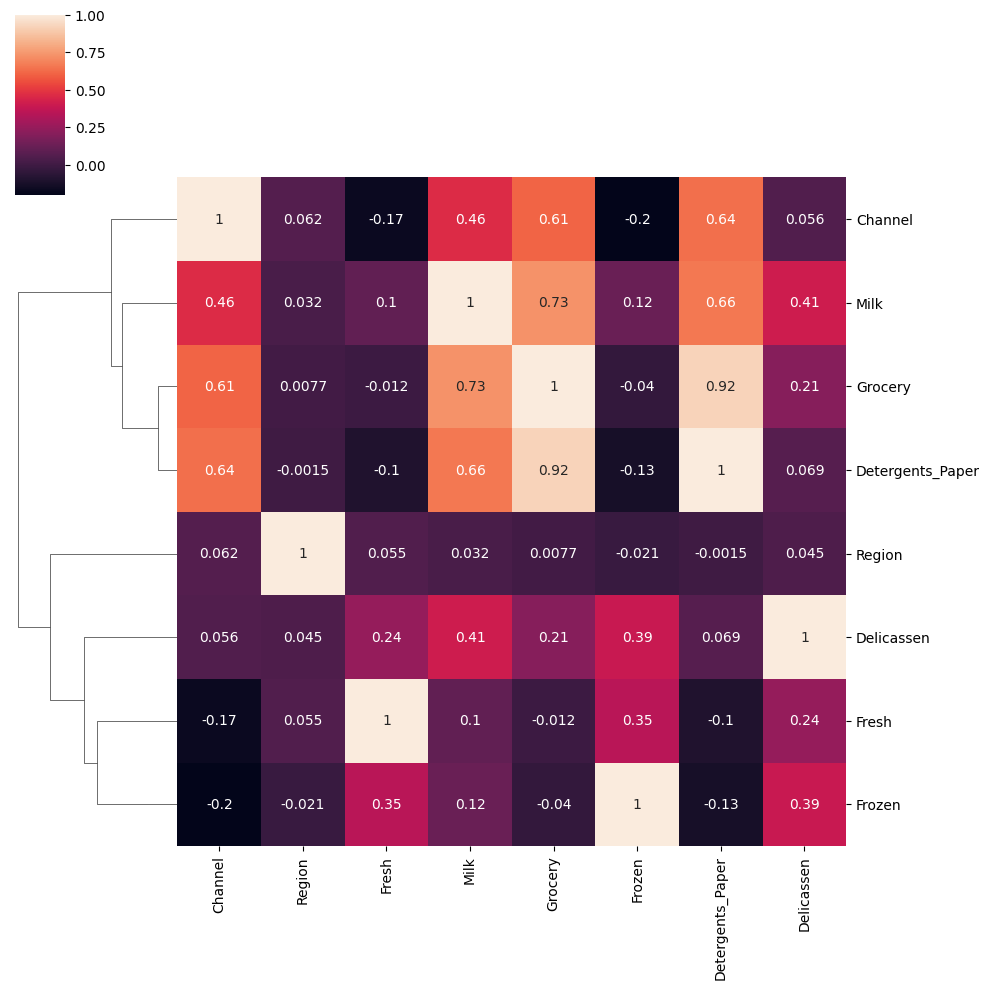

In [15]:
sns.clustermap(df.corr(),annot=True,col_cluster=False)

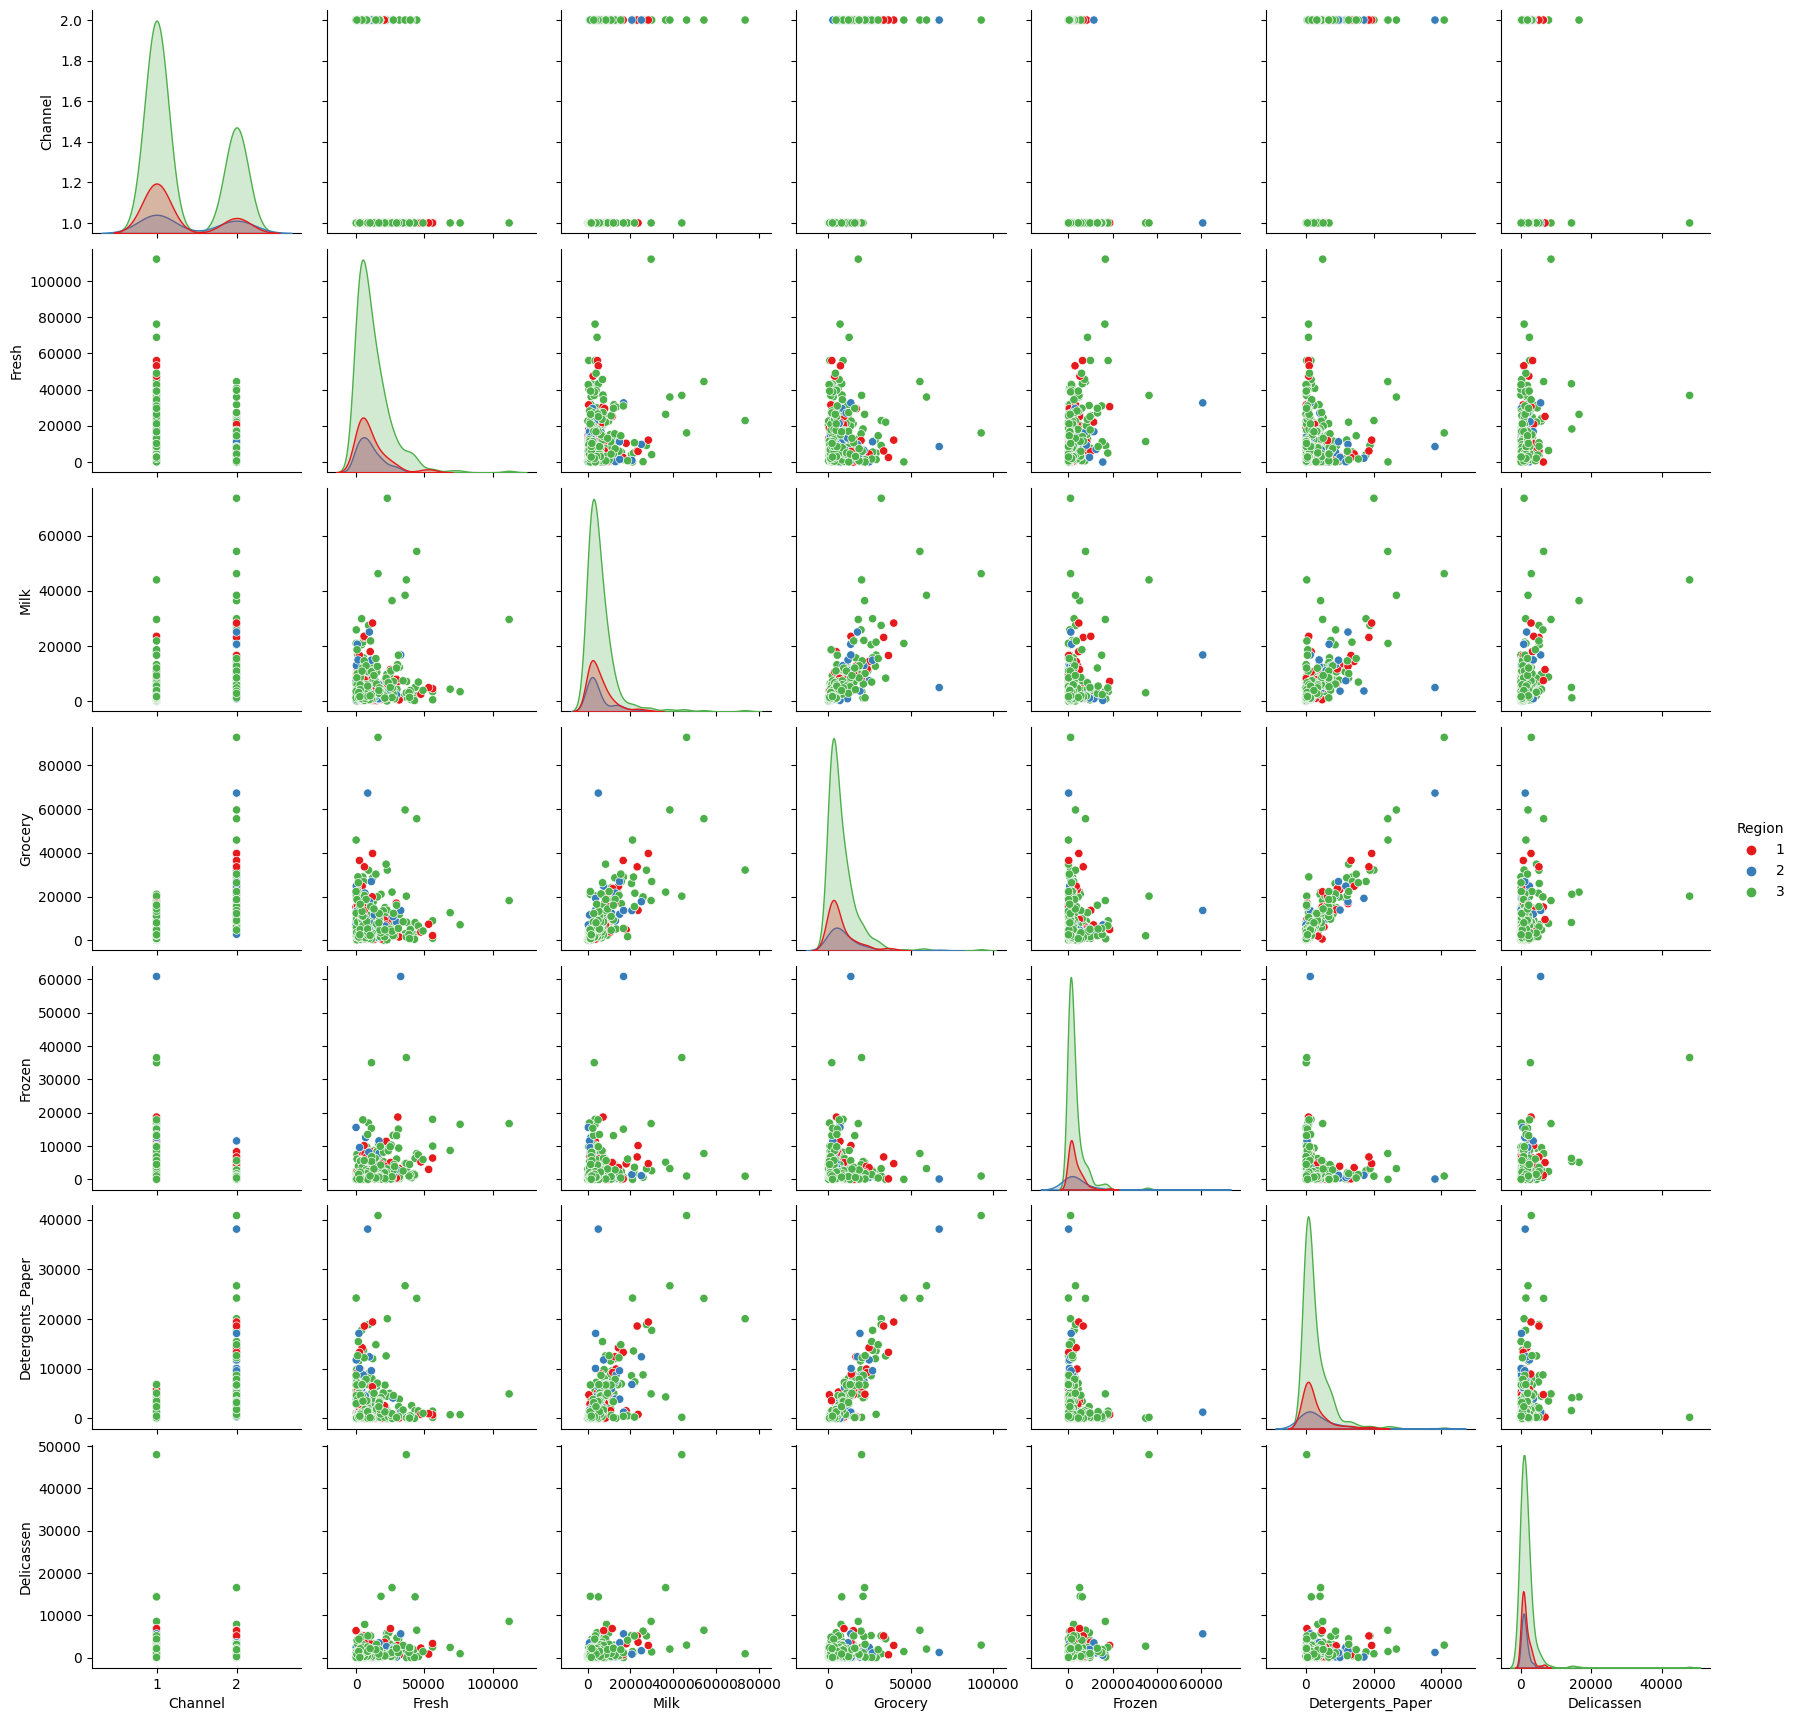

In [17]:
sns.pairplot(df,hue='Region', palette='Set1')

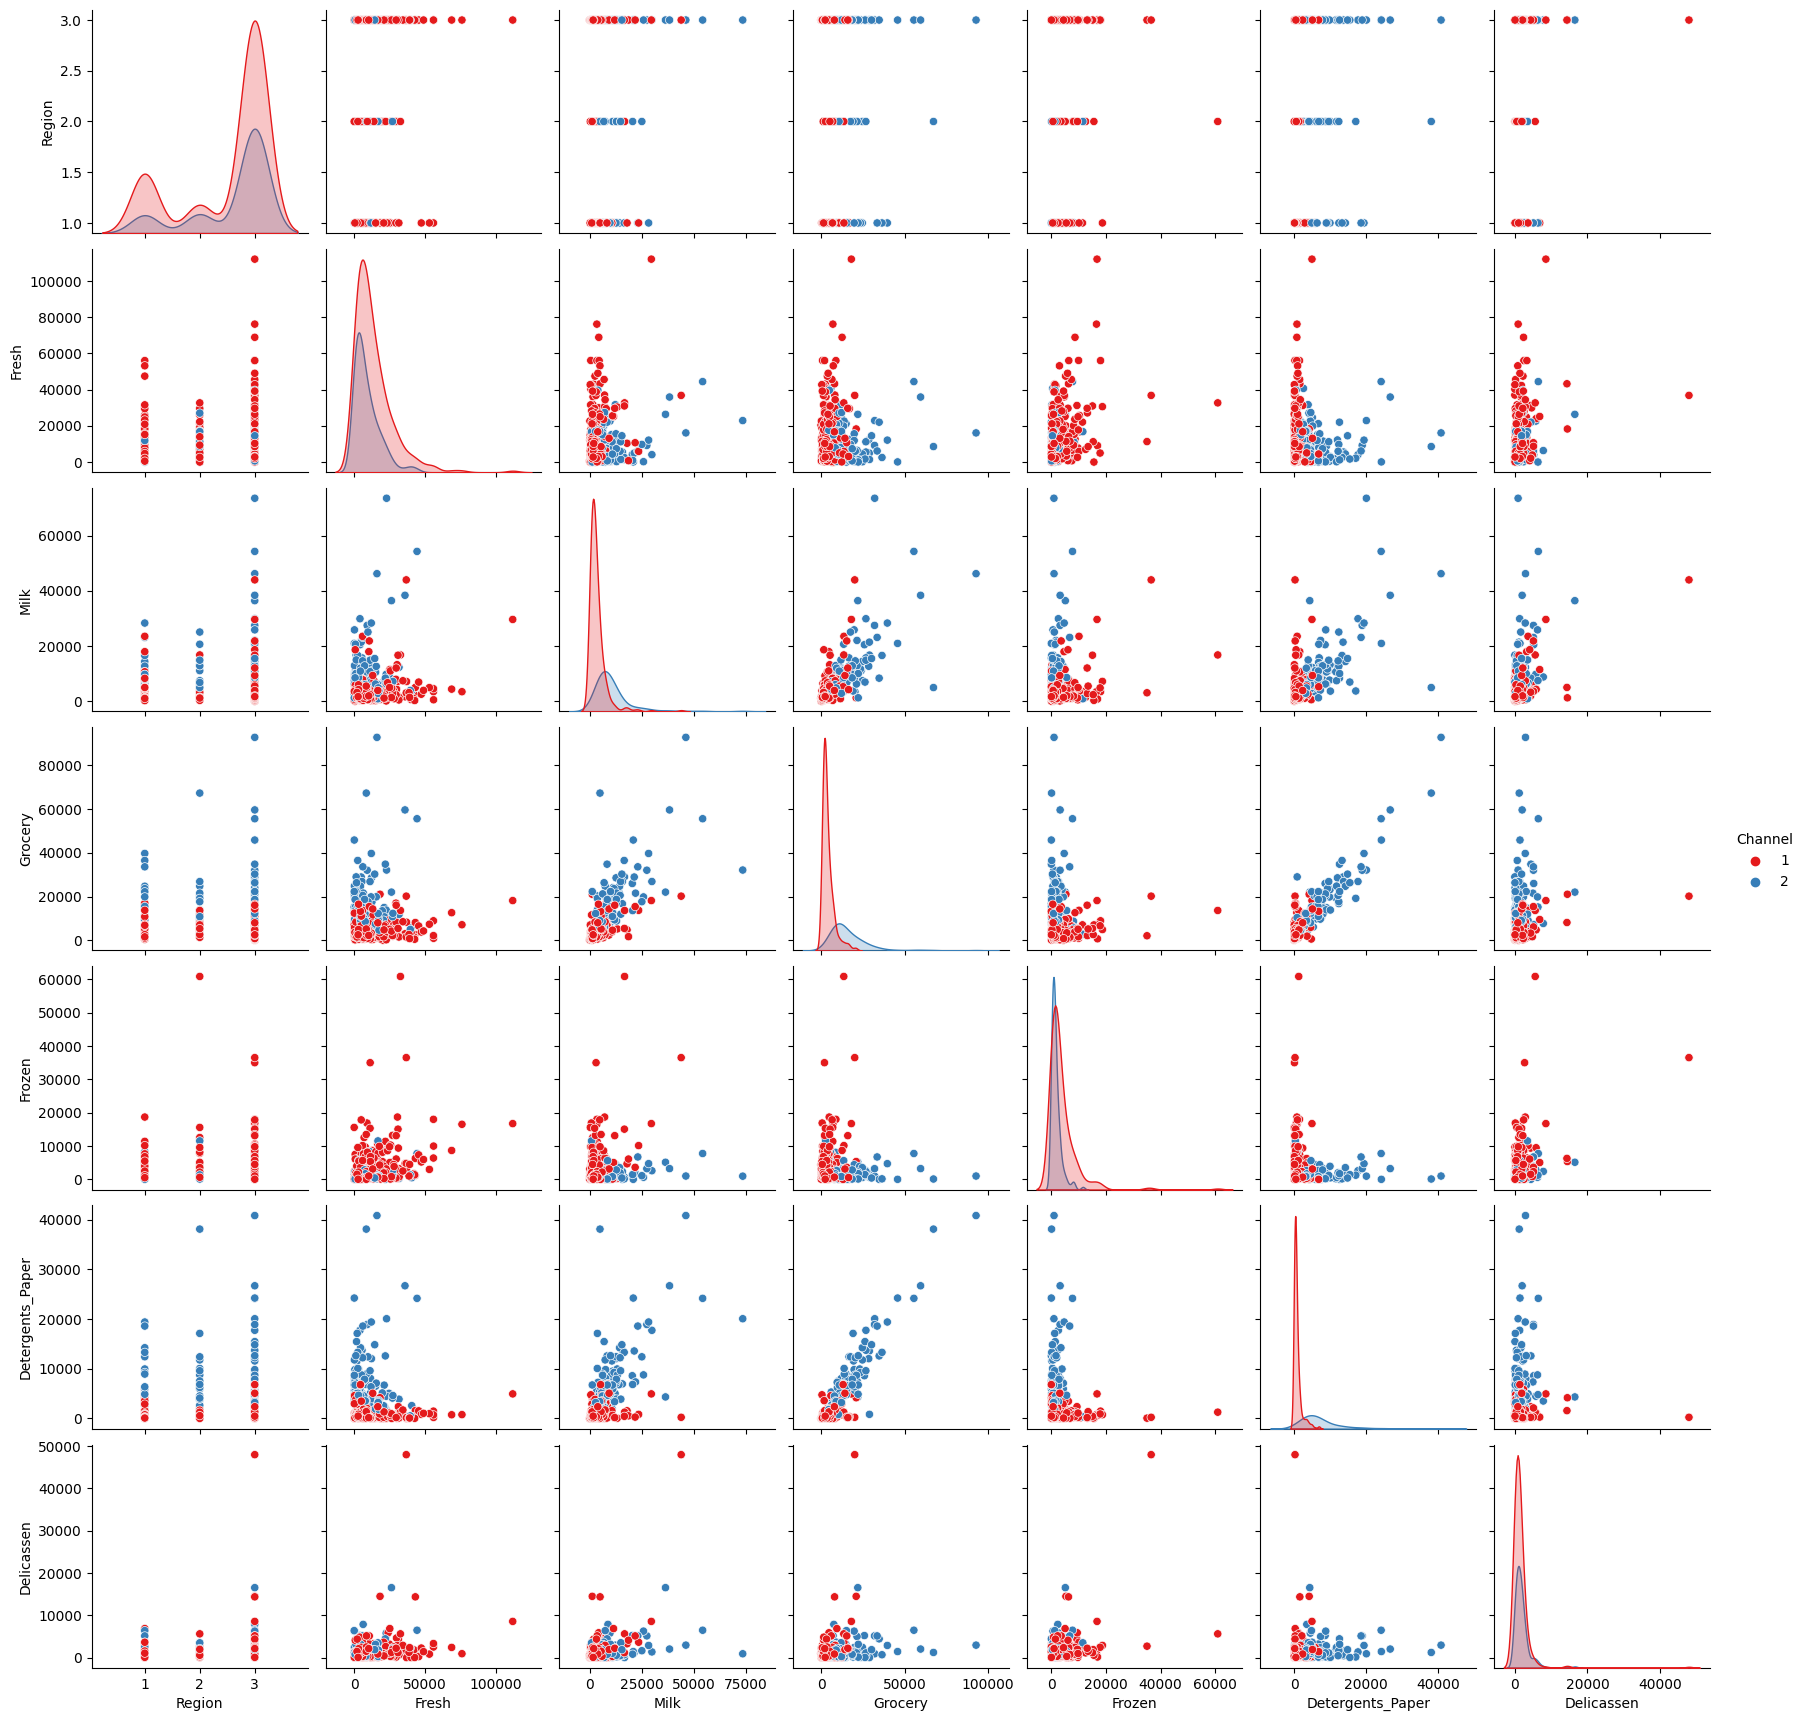

In [18]:
sns.pairplot(df,hue='Channel',palette='Set1')

In [19]:
scaler=MinMaxScaler()

In [20]:
scaled=scaler.fit_transform(df)

In [21]:
scaled_df=pd.DataFrame(scaled,columns=df.columns)

In [23]:
scaled_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.0,1.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,1.0,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.0,1.0,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


In [27]:
outlier_percent=[]
for eps in np.linspace(0.001,3,100):
    dbscan=DBSCAN(eps=eps,min_samples=16)
    labels=dbscan.fit_predict(scaled_df)
    outlier_percent.append(100*np.sum(labels==-1)/len(labels))
    

(0.0, 3.0)

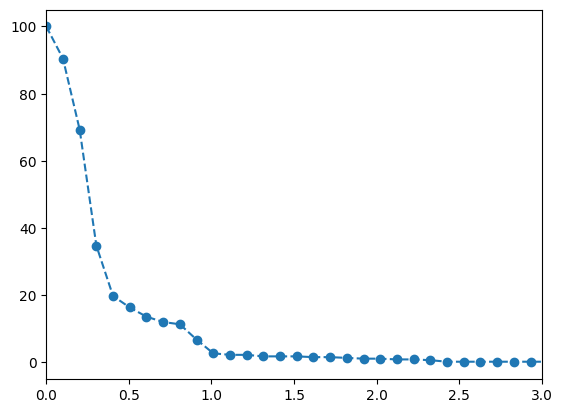

In [28]:
plt.plot(np.linspace(0.001,10,100),outlier_percent,'o--')
plt.xlim(0,3)

In [31]:
dbscan=DBSCAN(eps=1,min_samples=16)
labels=dbscan.fit_predict(scaled_df)

<Axes: xlabel='Grocery', ylabel='Milk'>

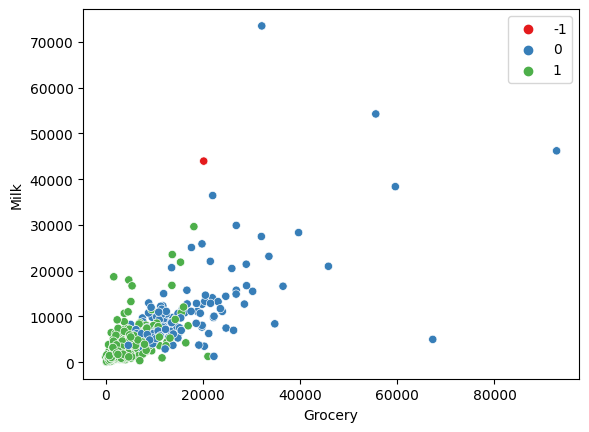

In [33]:
sns.scatterplot(df,x='Grocery',y='Milk',hue=labels,palette='Set1')


<Axes: xlabel='Milk', ylabel='Detergents_Paper'>

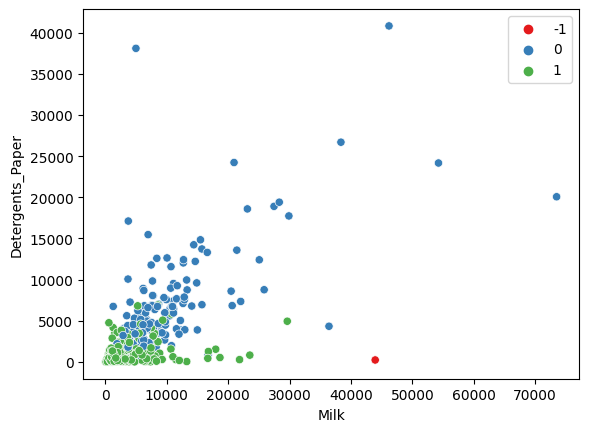

In [36]:
sns.scatterplot(df,y='Detergents_Paper',x='Milk',hue=labels,palette='Set1')


In [37]:
df['labels']=labels

<Axes: >

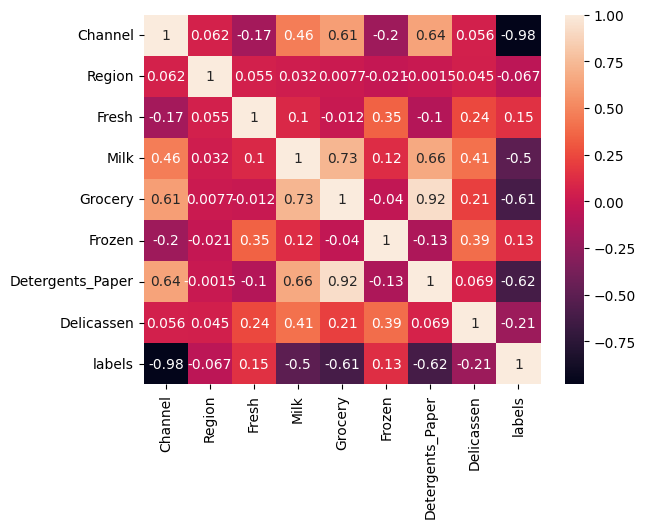

In [39]:
sns.heatmap(df.corr(),annot=True)

In [44]:
cat_means=df.drop(['Channel','Region'],axis=1).groupby('labels').mean()

In [52]:
scaled_cats=scaler.fit_transform(cat_means)
scaled_cat_df=pd.DataFrame(scaled_cats,columns=cat_means.columns)

<Axes: >

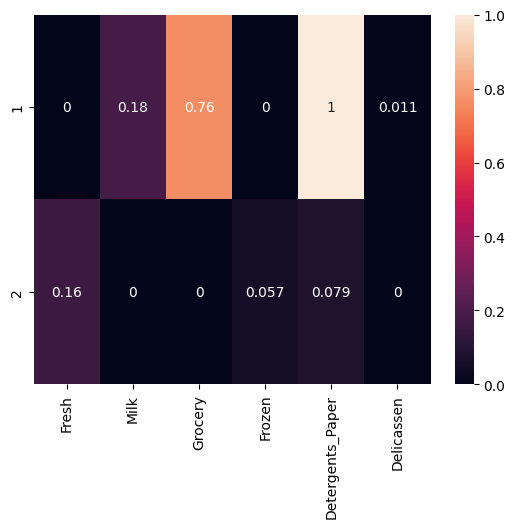

In [57]:
sns.heatmap(scaled_cat_df.iloc[[1,2]],annot=True)

In [56]:
scaled_cat_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
1,0.000000,0.182139,0.763433,0.000000,1.000000,0.010585
2,0.160777,0.000000,0.000000,0.056914,0.078717,0.000000
